In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris_images= load_iris()
dir(iris_images)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris_images.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [5]:
iris_images.target[0]

0

In [6]:
iris_images.target_names[0]

'setosa'

In [8]:
iris_images.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(iris_images.data,iris_images.target, test_size=0.3)


In [17]:
from sklearn.linear_model import LogisticRegression

reg= LogisticRegression()

In [18]:
reg.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_test

array([2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 2,
       0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0,
       1])

In [20]:
reg.predict(X_test)

array([2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1,
       0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0,
       1])

In [21]:
reg.score(X_test,y_test)

0.9111111111111111

In [22]:
from sklearn.metrics import confusion_matrix
y_predict= reg.predict(X_test)
cm= confusion_matrix(y_test,y_predict)
cm

array([[21,  0,  0],
       [ 0,  8,  1],
       [ 0,  3, 12]])

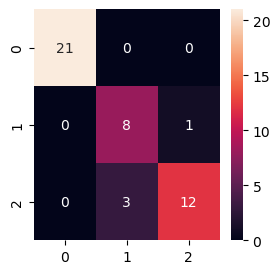

In [23]:
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot= True)
plt.xlabel= "Truth"
plt.ylabel= "Predicted"